<a href="https://colab.research.google.com/github/MarioQuiroga/new-cases-prediction-model-COVID19/blob/master/preprocesamiento_csv_casos_covid19_gob_ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cargar el dataset a un Dataframe pandas y mostrar sus columnas

In [ ]:
import pandas as pd
data = pd.read_csv('https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv')
 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data.head())

   id_evento_caso sexo  edad edad_años_meses residencia_pais_nombre  \
0         1000000    M  54.0            Años              Argentina   
1        10000000    F  52.0            Años              Argentina   
2        10000001    F  22.0            Años              Argentina   
3        10000002    F  43.0            Años              Argentina   
4        10000003    F  33.0            Años              Argentina   

  residencia_provincia_nombre residencia_departamento_nombre  \
0                        CABA                SIN ESPECIFICAR   
1                        CABA                SIN ESPECIFICAR   
2                Buenos Aires                Lomas de Zamora   
3                Buenos Aires                     La Matanza   
4                        CABA                      COMUNA 01   

  carga_provincia_nombre fecha_inicio_sintomas fecha_apertura  sepi_apertura  \
0           Buenos Aires                   NaN     2020-06-01             23   
1                   CABA    

### Calcular los nuevos casos y ordenar por fecha

In [ ]:
import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data['fecha_diagnostico'], format='%Y-%m-%d')
dates = {}
for i, row in data.iterrows():
    if row['clasificacion_resumen'] == 'Confirmado' and row['fecha_diagnostico']!='NaN' and row['date'].year>2019:                
        cur_date = row['date']
        if cur_date in dates:
            dates[cur_date] += 1
        else:
            dates[cur_date] = 1
sorted_dates = {k: v for k, v in sorted(dates.items(), key=lambda item: item[0])}
print(sorted_dates)
 
date_list = []
cases_list = []
accumulative_list = []
total = 0
for key, value in sorted_dates.items():
  if not pd.isnull(key):
    date_list.append(key)
    cases_list.append(value)
    
date_list = date_list[4:]
cases_list = cases_list[4:]
for i in range(len(date_list)):
    accumulative_list.append(total)  
    total += cases_list[i]

{Timestamp('2020-01-01 00:00:00'): 3, Timestamp('2020-01-02 00:00:00'): 13, Timestamp('2020-01-04 00:00:00'): 7, Timestamp('2020-01-05 00:00:00'): 4, Timestamp('2020-01-06 00:00:00'): 8, Timestamp('2020-01-07 00:00:00'): 3, Timestamp('2020-01-08 00:00:00'): 3, Timestamp('2020-01-12 00:00:00'): 2, Timestamp('2020-01-15 00:00:00'): 1, Timestamp('2020-01-16 00:00:00'): 1, Timestamp('2020-01-18 00:00:00'): 1, Timestamp('2020-01-19 00:00:00'): 10, Timestamp('2020-01-26 00:00:00'): 1, Timestamp('2020-01-28 00:00:00'): 2, Timestamp('2020-01-29 00:00:00'): 1, Timestamp('2020-01-30 00:00:00'): 2, Timestamp('2020-01-31 00:00:00'): 1, Timestamp('2020-02-02 00:00:00'): 2, Timestamp('2020-02-04 00:00:00'): 1, Timestamp('2020-02-10 00:00:00'): 1, Timestamp('2020-02-11 00:00:00'): 1, Timestamp('2020-02-13 00:00:00'): 1, Timestamp('2020-02-19 00:00:00'): 1, Timestamp('2020-02-24 00:00:00'): 1, Timestamp('2020-03-03 00:00:00'): 1, Timestamp('2020-03-06 00:00:00'): 7, Timestamp('2020-03-07 00:00:00'): 1

### Calcular targets 7 días y 14 días

In [ ]:
d14_list = []
d7_list = []
d30_list = []

for i, case in enumerate(cases_list):
  if i+7 < len(cases_list):
    d7_list.append(cases_list[i+7])
  else:
    d7_list.append(0)
  
  if i+14 < len(cases_list):
    d14_list.append(cases_list[i+14])
  else:
    d14_list.append(0)
  
  if i+30 < len(cases_list):
    d30_list.append(cases_list[i+30])
  else:
    d30_list.append(0)


### Graficar los casos

[Timestamp('2020-01-06 00:00:00'), Timestamp('2020-01-07 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-01-12 00:00:00'), Timestamp('2020-01-15 00:00:00'), Timestamp('2020-01-16 00:00:00'), Timestamp('2020-01-18 00:00:00'), Timestamp('2020-01-19 00:00:00'), Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'), Timestamp('2020-02-13 00:00:00'), Timestamp('2020-02-19 00:00:00'), Timestamp('2020-02-24 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('20

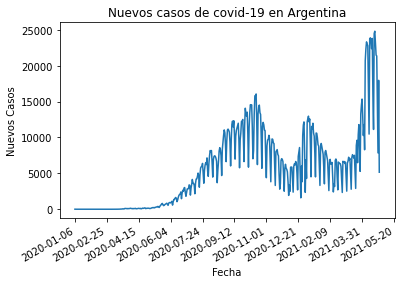

In [ ]:
print(date_list)
print(cases_list)
plt.xlabel('Fecha')
plt.ylabel('Nuevos Casos')
plt.title('Nuevos casos de covid-19 en Argentina')

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.plot(date_list,cases_list)
plt.gcf().autofmt_xdate()
plt.show()

#plt.scatter(date_list,cases_list)
#plt.xticks(rotation=45)
#plt.show()

### Mostrar el DataFrame


In [ ]:
# Add date and targets columns
data_frame = pd.DataFrame({'date':date_list, 
                           'target_cases':cases_list, 
                           'target_d7_cases':d7_list, 
                           'target_d14_cases':d14_list,
                           'target_d30_cases':d30_list 
                           #'total_yesterday':yesterday_list
                           }) 
# Remove rows = 0
data_frame = data_frame[data_frame['target_cases']!= 0]
data_frame = data_frame[data_frame['target_d7_cases']!= 0]
data_frame = data_frame[data_frame['target_d14_cases']!= 0] 
data_frame = data_frame[data_frame['target_d30_cases']!= 0] 
data_frame

,date,target_cases,target_d7_cases,target_d14_cases,target_d30_cases
0,2020-01-06,8,10,1,11
1,2020-01-07,3,1,1,10
2,2020-01-08,3,2,1,18
3,2020-01-12,2,1,1,29
4,2020-01-15,1,2,1,22
...,...,...,...,...,...
397,2021-03-17,7370,6447,15309,22491
398,2021-03-18,7116,10330,12998,14724
399,2021-03-19,7494,11769,10190,9899
400,2021-03-20,5350,8803,11656,18932


### Calcular variables predictoras y agregarlas al DataFrame

In [ ]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_i, dropnan=True):
  df = pd.DataFrame(data)
  cols = list()
  cols.append(df.shift(-1))
  # input sequence (t-n, ... t-1)
  for i in n_i:
  #for i in range(0, n_i): 
    cols.append(df[['target_cases']].shift(i-1).rename(columns={'target_cases': 'cases_'+str(i)+'_before'}))
  #cols.append(df[['target_cases']].shift(n_i-1).rename(columns={'target_cases': 'cases_'+str(7)+'_before'}))

  # put it all together
  agg = pd.concat(cols, axis=1)
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg

new_data = series_to_supervised(data_frame, [1,7,14,30])
#new_data = series_to_supervised(data_frame, 14)
pd.options.display.max_rows = 999
new_data

,date,target_cases,target_d7_cases,target_d14_cases,target_d30_cases,cases_1_before,cases_7_before,cases_14_before,cases_30_before
29,2020-03-15,11.0,54.0,109.0,127.0,7,2.0,1.0,8.0
30,2020-03-16,10.0,33.0,84.0,129.0,11,6.0,1.0,3.0
31,2020-03-17,18.0,105.0,90.0,106.0,10,9.0,1.0,3.0
32,2020-03-18,29.0,115.0,120.0,88.0,18,4.0,1.0,2.0
33,2020-03-19,22.0,110.0,142.0,122.0,29,10.0,1.0,1.0
34,2020-03-20,30.0,82.0,102.0,62.0,22,7.0,7.0,1.0
35,2020-03-21,62.0,69.0,104.0,94.0,30,7.0,1.0,1.0
36,2020-03-22,54.0,109.0,71.0,160.0,62,11.0,2.0,10.0
37,2020-03-23,33.0,84.0,105.0,119.0,54,10.0,6.0,1.0
38,2020-03-24,105.0,90.0,76.0,137.0,33,18.0,9.0,2.0


In [ ]:
# Rolling means 7, 14, and 30 days
new_data['mm_cases7'] = new_data['target_cases'].rolling(window=7).mean()
new_data['mm_cases14'] = new_data['target_cases'].rolling(window=14).mean()
new_data['mm_cases30'] = new_data['target_cases'].rolling(window=30).mean()

# Rolling max 7, 14, and 30 days
new_data['max_cases7'] = new_data['target_cases'].rolling(window=7).max()
new_data['max_cases14'] = new_data['target_cases'].rolling(window=14).max()
new_data['max_cases30'] = new_data['target_cases'].rolling(window=30).max()

# Rolling min 7, 14, and 30 days
new_data['min_cases7'] = new_data['target_cases'].rolling(window=7).min()
new_data['min_cases14'] = new_data['target_cases'].rolling(window=14).min()
new_data['min_cases30'] = new_data['target_cases'].rolling(window=30).min()

# Rolling std 7, 14, and 30 days
new_data['std_cases7'] = new_data['target_cases'].rolling(window=7).std()
new_data['std_cases14'] = new_data['target_cases'].rolling(window=14).std()
new_data['std_cases30'] = new_data['target_cases'].rolling(window=30).std()

# Compute day of week and day of month
new_data['dayofweek_num'] = new_data['date'].dt.dayofweek
new_data['dayofmonth_num'] = new_data['date'].dt.day
new_data


,date,target_cases,target_d7_cases,target_d14_cases,target_d30_cases,cases_1_before,cases_7_before,cases_14_before,cases_30_before,mm_cases7,mm_cases14,mm_cases30,max_cases7,max_cases14,max_cases30,min_cases7,min_cases14,min_cases30,std_cases7,std_cases14,std_cases30,dayofweek_num,dayofmonth_num
29,2020-03-15,11.0,54.0,109.0,127.0,7,2.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,15
30,2020-03-16,10.0,33.0,84.0,129.0,11,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16
31,2020-03-17,18.0,105.0,90.0,106.0,10,9.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17
32,2020-03-18,29.0,115.0,120.0,88.0,18,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,18
33,2020-03-19,22.0,110.0,142.0,122.0,29,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,19
34,2020-03-20,30.0,82.0,102.0,62.0,22,7.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,20
35,2020-03-21,62.0,69.0,104.0,94.0,30,7.0,1.0,1.0,26.000000,NaN,NaN,62.0,NaN,NaN,10.0,NaN,NaN,17.710637,NaN,NaN,5,21
36,2020-03-22,54.0,109.0,71.0,160.0,62,11.0,2.0,10.0,32.142857,NaN,NaN,62.0,NaN,NaN,10.0,NaN,NaN,19.047560,NaN,NaN,6,22
37,2020-03-23,33.0,84.0,105.0,119.0,54,10.0,6.0,1.0,35.428571,NaN,NaN,62.0,NaN,NaN,18.0,NaN,NaN,16.389602,NaN,NaN,0,23
38,2020-03-24,105.0,90.0,76.0,137.0,33,18.0,9.0,2.0,47.857143,NaN,NaN,105.0,NaN,NaN,22.0,NaN,NaN,29.059873,NaN,NaN,1,24


### Guardar DataFrame como csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
new_data.to_csv(r'gdrive/My Drive/data_covid19_gob_all.csv', index = False) 

Mounted at /content/gdrive
